In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, ZeroPadding2D
from sklearn.model_selection import train_test_split

In [2]:
# mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

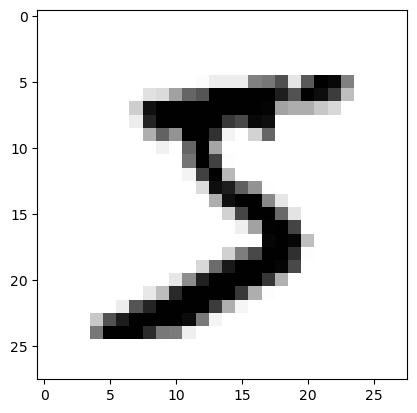

In [3]:
plt.imshow(x_train[0], cmap = 'gray_r')
plt.show()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train[0]

5

In [6]:
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

# 합성곱 신경망 설정

In [7]:
model = keras.Sequential()

In [8]:
# 합성곱 층 추가 
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                              input_shape = (28, 28, 1)))

C:\Users\ITSC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# 풀링층 추가 
model.add(keras.layers.MaxPool2D(2))

In [10]:
# 두번째 합성곱 - 풀링층 추가 
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'))

In [11]:
model.add(keras.layers.MaxPool2D(2))

In [12]:
# 3차원 특성맵을 일렬로 펼침
model.add(keras.layers.Flatten())

In [18]:
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))

In [14]:
# 종속변수 개수가 중요함 # 상태 그닥 안 좋음
# 총 10개의 범주가 있음 
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

- 위에까지가 쭉 은닉층

In [15]:
# 출력층 
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights= True)

# 모델 훈련 

In [18]:
# 검증 데이터 분할
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train,y_train, test_size = 0.2, stratify = y_train, random_state= 12)

In [19]:
history = model.fit(x_sub, y_sub, epochs = 30,validation_data= (x_val, y_val),
                    callbacks = [early_stopping_cb])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8807 - loss: 0.4144 - val_accuracy: 0.9764 - val_loss: 0.0745
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9802 - loss: 0.0656 - val_accuracy: 0.9798 - val_loss: 0.0678
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9866 - val_loss: 0.0488
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9910 - loss: 0.0305 - val_accuracy: 0.9857 - val_loss: 0.0463
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9874 - val_loss: 0.0393
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9941 - loss: 0.0196 - val_accuracy: 0.9854 - val_loss: 0.0459
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0.9872 - val_loss: 0.0438
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9964 - loss: 0.0118 - 

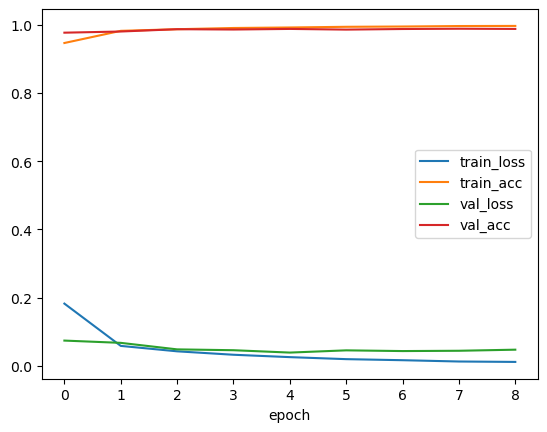

In [20]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

# 훈련 로그 확인 

In [21]:
history.history

{'accuracy': [0.9461666941642761,
  0.9817708134651184,
  0.9865624904632568,
  0.9901458621025085,
  0.9916458129882812,
  0.9936249852180481,
  0.9944791793823242,
  0.9958750009536743,
  0.9962083101272583],
 'loss': [0.1828092634677887,
  0.05893642082810402,
  0.04304380714893341,
  0.032996322959661484,
  0.026015516370534897,
  0.020129665732383728,
  0.01701500453054905,
  0.013220995664596558,
  0.011996359564363956],
 'val_accuracy': [0.9764166474342346,
  0.9798333048820496,
  0.9865833520889282,
  0.9856666922569275,
  0.987416684627533,
  0.9854166507720947,
  0.9871666431427002,
  0.9879999756813049,
  0.987416684627533],
 'val_loss': [0.07449708133935928,
  0.06784030795097351,
  0.04875488206744194,
  0.04628096893429756,
  0.03934885188937187,
  0.04589356109499931,
  0.043795958161354065,
  0.044665951281785965,
  0.04785451292991638]}

In [22]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0412


[0.03416742756962776, 0.9889000058174133]

In [23]:
preds = model.predict(scaled_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
preds.shape

(10000, 10)

In [25]:
preds[0]

array([1.1969510e-10, 4.9950945e-13, 5.0814677e-08, 2.7135184e-07,
       3.2185124e-13, 1.9550053e-11, 1.5172027e-18, 9.9999964e-01,
       8.5111931e-11, 1.3478908e-07], dtype=float32)

In [26]:
# 예측이 제일 큰 값
pred_arr = np.argmax(preds, axis = 1)

In [27]:
pred_arr

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [29]:
# 못 맞힌 애들 뽑아보기
x_match = []

for idx, item in enumerate(pred_arr):
    if item != y_test[idx]:
        x_match.append(idx)

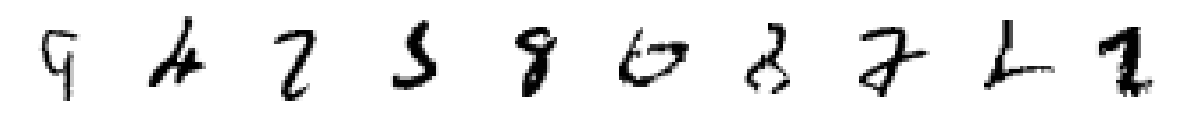

In [32]:
# 못 맞힌 애들 뽑아보기
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i, item in enumerate(x_match[:10]):
    axs[i].imshow(x_test[item], cmap = 'gray_r')
    axs[i].axis('off')
    
plt.show()

In [33]:
y_test[x_match[:10]]

array([9, 4, 2, 5, 8, 6, 8, 2, 2, 2], dtype=uint8)

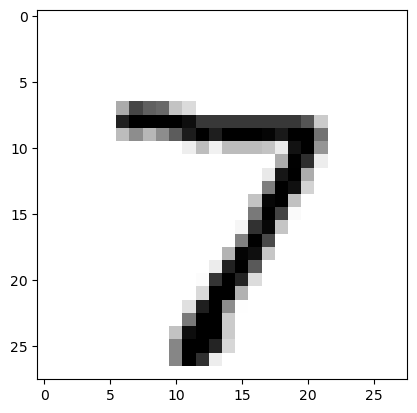

In [31]:
# 데이터 시각화 
plt.imshow(scaled_test[0].reshape(28, 28), cmap = 'gray_r') # 시각화 할 때는 28로 reshape
plt.show()

In [32]:
y_test[0]

7